# **Part 1: Building and Understanding GANs from Scratch**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import math

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


Training Sine Wave GAN...
Epoch [0/1000], D Loss: 1.2392, G Loss: 0.5221
Epoch [100/1000], D Loss: 1.3069, G Loss: 0.7569
Epoch [200/1000], D Loss: 1.3892, G Loss: 0.6820
Epoch [300/1000], D Loss: 1.3144, G Loss: 0.6396
Epoch [400/1000], D Loss: 1.5169, G Loss: 0.6948
Epoch [500/1000], D Loss: 1.3834, G Loss: 0.7343
Epoch [600/1000], D Loss: 1.3924, G Loss: 0.6705
Epoch [700/1000], D Loss: 1.2747, G Loss: 0.6273
Epoch [800/1000], D Loss: 1.3976, G Loss: 0.6552
Epoch [900/1000], D Loss: 1.2385, G Loss: 0.8972


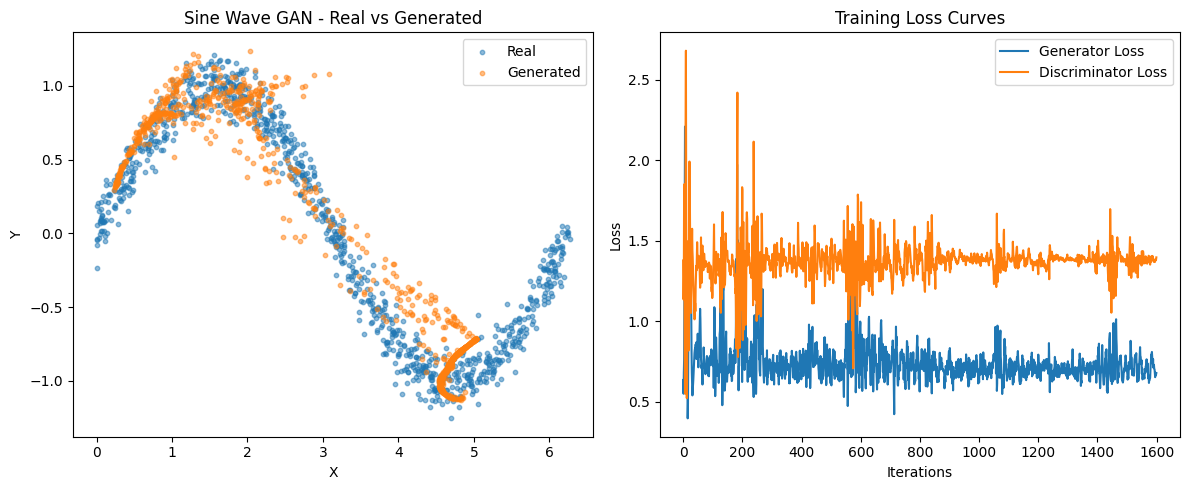

In [3]:
# Generate synthetic sine wave data
def generate_sine_data(n_samples=1000):
    x = np.random.uniform(0, 2 * np.pi, n_samples)
    y = np.sin(x) + 0.1 * np.random.randn(n_samples)  # Add some noise
    data = np.column_stack([x, y])
    return torch.FloatTensor(data)

# Define Generator
class Generator(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=128, output_dim=2):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training function for GAN
def train_gan(generator, discriminator, data_loader, num_epochs=1000):
    # Optimizers
    g_optimizer = optim.Adam(generator.parameters(), lr=0.001)
    d_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)

    # Loss function
    criterion = nn.BCELoss()

    g_losses = []
    d_losses = []

    for epoch in range(num_epochs):
        for real_data in data_loader:
            batch_size = real_data.size(0)

            # Train Discriminator
            d_optimizer.zero_grad()

            # Real data
            real_data = real_data.to(device) # Move real data to the device
            real_labels = torch.ones(batch_size, 1).to(device) # Move labels to the device
            real_output = discriminator(real_data)
            real_loss = criterion(real_output, real_labels)

            # Fake data
            noise = torch.randn(batch_size, 2).to(device) # Move noise to the device
            fake_data = generator(noise)
            fake_labels = torch.zeros(batch_size, 1).to(device) # Move labels to the device
            fake_output = discriminator(fake_data.detach())
            fake_loss = criterion(fake_output, fake_labels)

            # Total discriminator loss
            d_loss = real_loss + fake_loss
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            g_optimizer.zero_grad()

            # Generate fake data and try to fool discriminator
            noise = torch.randn(batch_size, 2).to(device) # Move noise to the device
            fake_data = generator(noise)
            fake_output = discriminator(fake_data)
            g_loss = criterion(fake_output, real_labels)  # Try to make discriminator think it's real

            g_loss.backward()
            g_optimizer.step()

            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())

        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

    return g_losses, d_losses

# Generate sine wave data
sine_data = generate_sine_data(1000)
data_loader = torch.utils.data.DataLoader(sine_data, batch_size=64, shuffle=True)

# Initialize models
generator_sine = Generator().to(device)
discriminator_sine = Discriminator().to(device)

# Train the sine wave GAN
print("Training Sine Wave GAN...")
g_losses_sine, d_losses_sine = train_gan(generator_sine, discriminator_sine, data_loader, num_epochs=1000)

# Visualize results
def plot_results(generator, real_data, title):
    generator.eval()
    with torch.no_grad():
        # Generate fake samples
        noise = torch.randn(1000, 2).to(device) # Move noise to the device
        fake_data = generator(noise).cpu().numpy()
        real_data_np = real_data.cpu().numpy()

    plt.figure(figsize=(12, 5))

    # Plot real vs fake data
    plt.subplot(1, 2, 1)
    plt.scatter(real_data_np[:, 0], real_data_np[:, 1], alpha=0.5, label='Real', s=10)
    plt.scatter(fake_data[:, 0], fake_data[:, 1], alpha=0.5, label='Generated', s=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{title} - Real vs Generated')
    plt.legend()

    # Plot loss curves
    plt.subplot(1, 2, 2)
    plt.plot(g_losses_sine[::10], label='Generator Loss')
    plt.plot(d_losses_sine[::10], label='Discriminator Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss Curves')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(generator_sine, sine_data, "Sine Wave GAN")


Training Parametric Curve GAN...
Epoch [0/1000], D Loss: 0.9538, G Loss: 0.8050
Epoch [100/1000], D Loss: 1.3601, G Loss: 0.7627
Epoch [200/1000], D Loss: 1.2292, G Loss: 0.9043
Epoch [300/1000], D Loss: 1.2203, G Loss: 0.9836
Epoch [400/1000], D Loss: 1.2198, G Loss: 1.1555
Epoch [500/1000], D Loss: 1.0840, G Loss: 0.9863
Epoch [600/1000], D Loss: 0.9447, G Loss: 1.0101
Epoch [700/1000], D Loss: 1.1455, G Loss: 0.8614
Epoch [800/1000], D Loss: 1.2041, G Loss: 0.8736
Epoch [900/1000], D Loss: 1.1414, G Loss: 1.1672


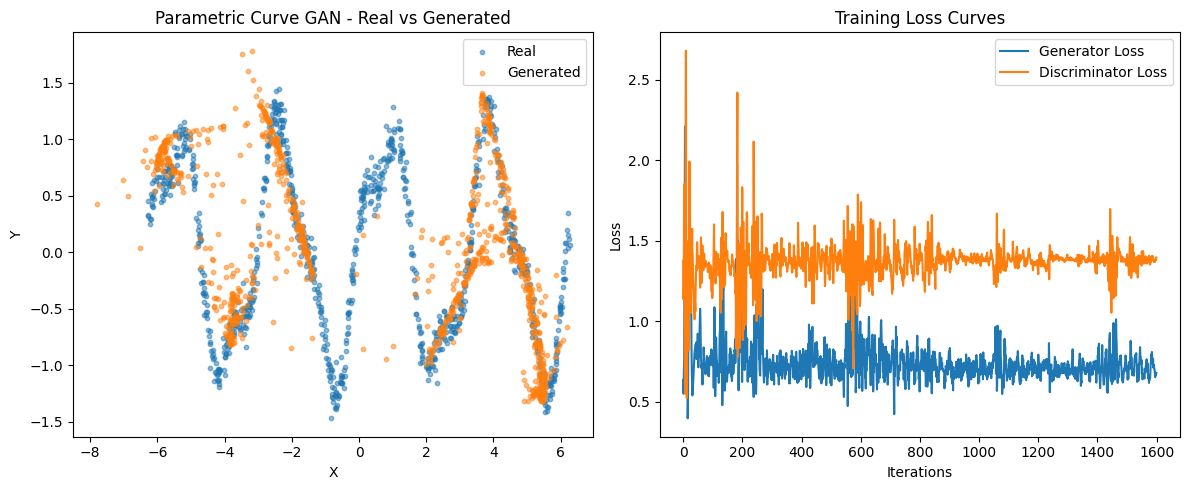

In [5]:
# Generate the noisy parametric curve data
def generate_parametric_curve_data(n_samples=1000):
    x = np.random.uniform(-2 * np.pi, 2 * np.pi, n_samples)
    epsilon = 0.1 * np.random.randn(n_samples)  # Noise term
    y = np.sin(2 * x) + 0.3 * np.cos(5 * x) + epsilon
    data = np.column_stack([x, y])
    return torch.FloatTensor(data)

# Generate parametric curve data
parametric_data = generate_parametric_curve_data(1000)
parametric_loader = torch.utils.data.DataLoader(parametric_data, batch_size=64, shuffle=True)

# Initialize new models for parametric curve
generator_parametric = Generator().to(device)
discriminator_parametric = Discriminator().to(device)

# Train the parametric curve GAN
print("\nTraining Parametric Curve GAN...")
g_losses_parametric, d_losses_parametric = train_gan(
    generator_parametric, discriminator_parametric, parametric_loader, num_epochs=1000
)

# Visualize results
plot_results(generator_parametric, parametric_data, "Parametric Curve GAN")


Training Modified GAN...
Modified GAN - Epoch [0/1000], D Loss: 1.1959, G Loss: 0.6745
Modified GAN - Epoch [100/1000], D Loss: 0.5635, G Loss: 2.0724
Modified GAN - Epoch [200/1000], D Loss: 0.4732, G Loss: 2.1153
Modified GAN - Epoch [300/1000], D Loss: 0.3931, G Loss: 2.1903
Modified GAN - Epoch [400/1000], D Loss: 0.3368, G Loss: 2.1638
Modified GAN - Epoch [500/1000], D Loss: 0.3403, G Loss: 2.3833
Modified GAN - Epoch [600/1000], D Loss: 0.5856, G Loss: 2.2045
Modified GAN - Epoch [700/1000], D Loss: 0.3901, G Loss: 2.2274
Modified GAN - Epoch [800/1000], D Loss: 0.5592, G Loss: 2.1077
Modified GAN - Epoch [900/1000], D Loss: 0.3362, G Loss: 2.3740


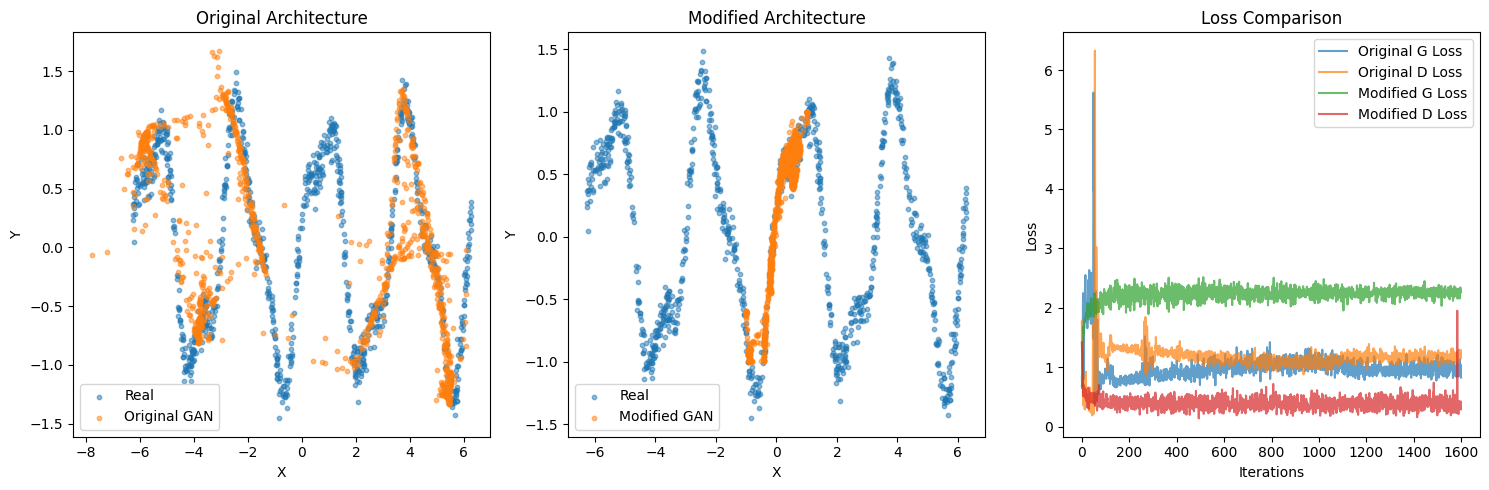

In [9]:
# Generate the noisy parametric curve data
def generate_parametric_curve_data(n_samples=1000):
    x = np.random.uniform(-2 * np.pi, 2 * np.pi, n_samples)
    epsilon = 0.1 * np.random.randn(n_samples)  # Noise term
    y = np.sin(2 * x) + 0.3 * np.cos(5 * x) + epsilon
    data = np.column_stack([x, y])
    return torch.FloatTensor(data)

# Generate parametric curve data
parametric_data = generate_parametric_curve_data(1000)
parametric_loader = torch.utils.data.DataLoader(parametric_data, batch_size=64, shuffle=True)

# Modified Generator with deeper architecture and different activations
class ModifiedGenerator(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=256, output_dim=2):
        super(ModifiedGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim // 2, hidden_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim // 2, output_dim),
            nn.Tanh()  # Output activation to bound the outputs
        )

    def forward(self, x):
        return self.model(x)

# Modified Discriminator with deeper architecture
class ModifiedDiscriminator(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=256):
        super(ModifiedDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim // 4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize modified models
modified_generator = ModifiedGenerator().to(device)
modified_discriminator = ModifiedDiscriminator().to(device)

# Optimizers for modified architecture
g_optimizer_mod = optim.Adam(modified_generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
d_optimizer_mod = optim.Adam(modified_discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training function for modified GAN
def train_modified_gan(generator, discriminator, data_loader, num_epochs=1000):
    criterion = nn.BCELoss()
    g_losses = []
    d_losses = []

    for epoch in range(num_epochs):
        for real_data in data_loader:
            batch_size = real_data.size(0)

            # Train Discriminator
            d_optimizer_mod.zero_grad()

            # Real data
            real_data = real_data.to(device) # Move real data to the device
            real_labels = torch.ones(batch_size, 1).to(device) # Move labels to the device
            real_output = discriminator(real_data)
            real_loss = criterion(real_output, real_labels)

            # Fake data
            noise = torch.randn(batch_size, 2).to(device) # Move noise to the device
            fake_data = generator(noise)
            fake_labels = torch.zeros(batch_size, 1).to(device) # Move labels to the device
            fake_output = discriminator(fake_data.detach())
            fake_loss = criterion(fake_output, fake_labels)

            d_loss = real_loss + fake_loss
            d_loss.backward()
            d_optimizer_mod.step()

            # Train Generator
            g_optimizer_mod.zero_grad()

            noise = torch.randn(batch_size, 2).to(device) # Move noise to the device
            fake_data = generator(noise)
            fake_output = discriminator(fake_data)
            g_loss = criterion(fake_output, real_labels)

            g_loss.backward()
            g_optimizer_mod.step()

            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())

        if epoch % 100 == 0:
            print(f'Modified GAN - Epoch [{epoch}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

    return g_losses, d_losses

# Train modified GAN on parametric curve data
print("\nTraining Modified GAN...")
g_losses_modified, d_losses_modified = train_modified_gan(
    modified_generator, modified_discriminator, parametric_loader, num_epochs=1000
)

# Compare original vs modified architectures
def compare_architectures(original_gen, modified_gen, real_data, title):
    original_gen.eval()
    modified_gen.eval()

    with torch.no_grad():
        noise = torch.randn(1000, 2).to(device) # Move noise to the device
        original_fake = original_gen(noise).cpu().numpy()
        modified_fake = modified_gen(noise).cpu().numpy()
        real_data_np = real_data.cpu().numpy()

    plt.figure(figsize=(15, 5))

    # Original architecture
    plt.subplot(1, 3, 1)
    plt.scatter(real_data_np[:, 0], real_data_np[:, 1], alpha=0.5, label='Real', s=10)
    plt.scatter(original_fake[:, 0], original_fake[:, 1], alpha=0.5, label='Original GAN', s=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Architecture')
    plt.legend()

    # Modified architecture
    plt.subplot(1, 3, 2)
    plt.scatter(real_data_np[:, 0], real_data_np[:, 1], alpha=0.5, label='Real', s=10)
    plt.scatter(modified_fake[:, 0], modified_fake[:, 1], alpha=0.5, label='Modified GAN', s=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Modified Architecture')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 3, 3)
    plt.plot(g_losses_parametric[::10], label='Original G Loss', alpha=0.7)
    plt.plot(d_losses_parametric[::10], label='Original D Loss', alpha=0.7)
    plt.plot(g_losses_modified[::10], label='Modified G Loss', alpha=0.7)
    plt.plot(d_losses_modified[::10], label='Modified D Loss', alpha=0.7)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()

compare_architectures(generator_parametric, modified_generator, parametric_data, "Architecture Comparison")

# **Part 2 -- Option 2: Cybersecurity – Synthetic Traffic with CICIDS 2017**

In [ ]:
import pandas as pd
import glob

# Get a list of all csv files in the content directory
wed = pd.read_csv('/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv')

# Display the first few rows and information about the combined dataframe
display(wed.head())
wed.info()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [ ]:
# Remove leading spaces from column names
wed.columns = wed.columns.str.lstrip()

# Display the updated column names to confirm the changes
print(wed.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
# Convert column names to lowercase and replace spaces with underscores
wed.columns = wed.columns.str.lower().str.replace(' ', '_')

# Display the updated column names to confirm the changes
print(wed.columns)

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [ ]:
wed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   destination_port             692703 non-null  int64  
 1   flow_duration                692703 non-null  int64  
 2   total_fwd_packets            692703 non-null  int64  
 3   total_backward_packets       692703 non-null  int64  
 4   total_length_of_fwd_packets  692703 non-null  int64  
 5   total_length_of_bwd_packets  692703 non-null  int64  
 6   fwd_packet_length_max        692703 non-null  int64  
 7   fwd_packet_length_min        692703 non-null  int64  
 8   fwd_packet_length_mean       692703 non-null  float64
 9   fwd_packet_length_std        692703 non-null  float64
 10  bwd_packet_length_max        692703 non-null  int64  
 11  bwd_packet_length_min        692703 non-null  int64  
 12  bwd_packet_length_mean       692703 non-null  float64
 13 

In [ ]:
wed.isnull().sum()

destination_port               0
flow_duration                  0
total_fwd_packets              0
total_backward_packets         0
total_length_of_fwd_packets    0
                              ..
idle_mean                      0
idle_std                       0
idle_max                       0
idle_min                       0
label                          0
Length: 79, dtype: int64

In [ ]:
initial_rows = wed.shape[0]
wed.drop_duplicates(inplace=True)
rows_after_dropping = wed.shape[0]
dropped_rows_count = initial_rows - rows_after_dropping
print(f"Number of duplicate rows dropped: {dropped_rows_count}")

Number of duplicate rows dropped: 81909


In [ ]:
missing_values = wed.isnull().sum()
print(f"Missing Values per Column:\n{missing_values[missing_values > 0]}")

Missing Values per Column:
flow_bytes/s    61
dtype: int64


In [ ]:
wed['flow_bytes/s'] = pd.to_numeric(wed['flow_bytes/s'], errors='coerce')
wed['flow_bytes/s'] = wed['flow_bytes/s'].fillna(wed['flow_bytes/s'].mean())
# Verify that missing values are filled
missing_values_after = wed.isnull().sum()
print(f"Missing Values after filling:\n{missing_values_after[missing_values_after > 0]}")

Missing Values after filling:
Series([], dtype: int64)


In [ ]:
import numpy as np

infinite_values = wed.isin([np.inf, -np.inf]).sum()
print(f"Infinite Values per Column:\n{infinite_values[infinite_values > 0]}")

Infinite Values per Column:
flow_bytes/s      302
flow_packets/s    302
dtype: int64


In [ ]:
wed = wed.replace([np.inf, -np.inf], np.nan)

In [ ]:
wed['destination_port'] = pd.to_numeric(wed['destination_port'], errors='coerce')

In [ ]:
wed['label'].value_counts()

label
BENIGN              417035
DoS Hulk            172849
DoS GoldenEye        10286
DoS slowloris         5385
DoS Slowhttptest      5228
Heartbleed              11
Name: count, dtype: int64

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
label_encoder = LabelEncoder()
wed['label'] = label_encoder.fit_transform(wed['label'])
class_counts = wed['label'].value_counts()
classes_to_remove = class_counts[class_counts < 2].index
wed = wed[~wed['label'].isin(classes_to_remove)]

# Impute missing values after removing classes with only one sample
imputer = SimpleImputer(strategy='mean')
wed_imputed = imputer.fit_transform(wed.drop(columns=['label']))
wed_imputed = pd.DataFrame(wed_imputed, columns=wed.drop(columns=['label']).columns)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wed_imputed)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    wed['label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=wed['label'])

In [ ]:
# Define the Generator and Discriminator classes again
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, output_dim),
        )

    def forward(self, noise):
        return self.main(noise)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, features):
        return self.main(features)

# Define loss function (Binary Cross-Entropy)
criterion = nn.BCELoss()

# Define optimizers
latent_dim = 100 # Example latent dimension
output_dim = X_train.shape[1] # Number of features in the dataset

generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)

optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

print("Loss function and optimizers defined.")

Loss function and optimizers defined.


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Define training parameters
num_epochs = 5
batch_size = 64

# Create a PyTorch DataLoader for the training data
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32))
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(train_dataloader):
        real_data = data[0]
        batch_size = real_data.size(0)

        # Labels for real and fake data
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_d.zero_grad()

        # Train with real data
        output_real = discriminator(real_data)
        d_loss_real = criterion(output_real, real_labels)
        d_loss_real.backward()

        # Train with fake data
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        output_fake = discriminator(fake_data.detach()) # Detach to prevent gradient flow to generator
        d_loss_fake = criterion(output_fake, fake_labels)
        d_loss_fake.backward()

        # Update discriminator weights
        d_loss = d_loss_real + d_loss_fake
        optimizer_d.step()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_g.zero_grad()

        # Generate fake data and train generator to fool discriminator
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        output_fake = discriminator(fake_data)
        g_loss = criterion(output_fake, real_labels) # Generator wants discriminator to think fake is real

        # Update generator weights
        g_loss.backward()
        optimizer_g.step()

        # --------------
        # Log Progress
        # --------------
        if (i+1) % 1000 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

print("Training finished.")

Epoch [1/5], Step [1000/7635], D_loss: 1.6775, G_loss: 4.3389
Epoch [1/5], Step [2000/7635], D_loss: 0.0857, G_loss: 3.2456
Epoch [1/5], Step [3000/7635], D_loss: 0.0358, G_loss: 3.6009
Epoch [1/5], Step [4000/7635], D_loss: 0.7396, G_loss: 6.4898
Epoch [1/5], Step [5000/7635], D_loss: 0.1168, G_loss: 3.9289
Epoch [1/5], Step [6000/7635], D_loss: 0.4184, G_loss: 4.1040
Epoch [1/5], Step [7000/7635], D_loss: 0.2060, G_loss: 4.0916
Epoch [2/5], Step [1000/7635], D_loss: 0.0159, G_loss: 6.3409
Epoch [2/5], Step [2000/7635], D_loss: 0.1662, G_loss: 3.9446
Epoch [2/5], Step [3000/7635], D_loss: 0.0897, G_loss: 4.6511
Epoch [2/5], Step [4000/7635], D_loss: 0.0414, G_loss: 4.9178
Epoch [2/5], Step [5000/7635], D_loss: 0.0532, G_loss: 4.6822
Epoch [2/5], Step [6000/7635], D_loss: 0.2134, G_loss: 3.5646
Epoch [2/5], Step [7000/7635], D_loss: 0.0762, G_loss: 3.7725
Epoch [3/5], Step [1000/7635], D_loss: 0.2825, G_loss: 3.7673
Epoch [3/5], Step [2000/7635], D_loss: 0.1929, G_loss: 4.7459
Epoch [3

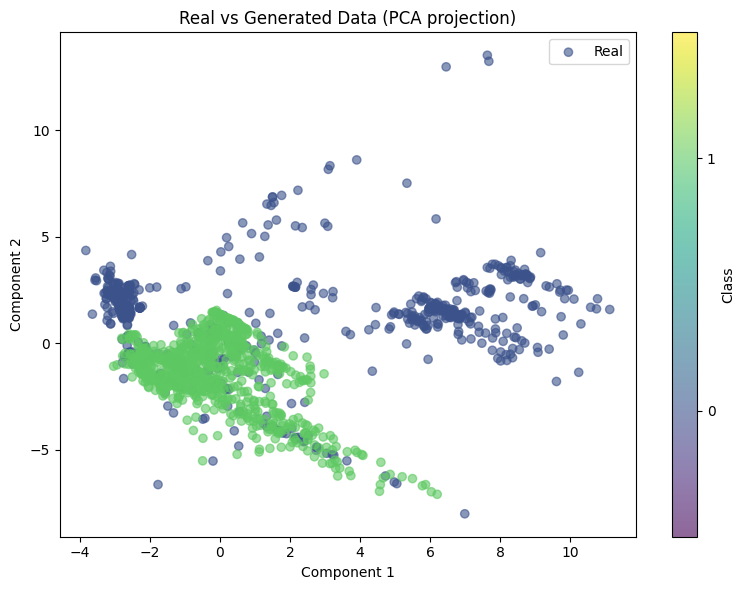

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Number of samples to visualize
num_samples = 1000

# Generate fake data using the trained generator
noise = torch.randn(num_samples, latent_dim)
generated_data = generator(noise).detach().numpy()

# Take a subset of real data for comparison
real_data_subset = X_train[:num_samples]

# Combine real and generated data for dimensionality reduction
all_data = np.vstack([real_data_subset, generated_data])
labels = ['Real'] * num_samples + ['Generated'] * num_samples

# ---------------------
# Dimensionality Reduction
# ---------------------

# Option 1: Use PCA
reducer = PCA(n_components=2)
reduced_data = reducer.fit_transform(all_data)

# Option 2: Use t-SNE (uncomment to use)
# reducer = TSNE(n_components=2, perplexity=30, n_iter=300)
# reduced_data = reducer.fit_transform(all_data)

# ---------------------
# Plotting
# ---------------------
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=[0 if label == 'Real' else 1 for label in labels], cmap='viridis', alpha=0.6)
plt.title("Real vs Generated Data (PCA projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter, ticks=[0, 1], label='Class')
plt.clim(-0.5, 1.5)
plt.legend(['Real', 'Generated'], loc='upper right')
plt.tight_layout()
plt.show()

=== Statistical Evaluation ===
Average Mean Difference: 0.2102
Average Std Difference: 0.4641

=== Statistical Tests ===
Average KS Statistic: 0.6060
KS Test Interpretation: < 0.1 excellent, < 0.2 good, < 0.3 fair

=== Discriminative Score ===
Discriminative Score (Accuracy): 1.0000
Ideal Score: 0.5000 (perfectly indistinguishable)

=== Correlation Analysis ===
Correlation Matrix Difference (Frobenius norm): 23.3962

=== Coverage and Authenticity ===
Data Coverage: 0.9542
Data Authenticity: 0.9718

=== Generating Distribution Plots ===


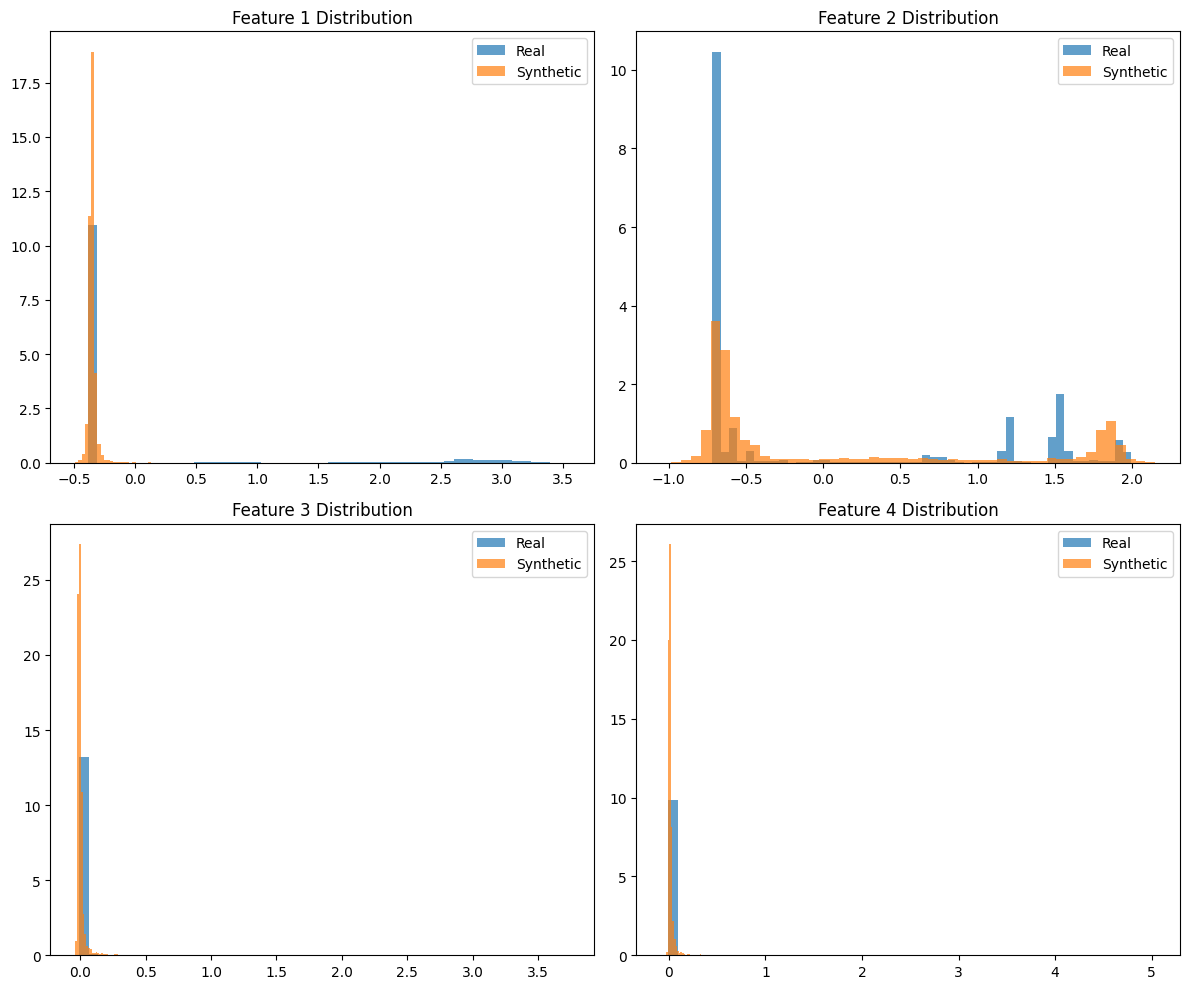


=== Summary Scores ===
Statistical Similarity Score: 0.3940
Quality Score (1 - |0.5 - disc_score|): 0.5000
Coverage Score: 0.9542
Authenticity Score: 0.9718

Overall Quality Score: 0.6534
Score Interpretation: > 0.8 excellent, > 0.6 good, > 0.4 fair, ≤ 0.4 poor

DETAILED EVALUATION RESULTS
mean_diff: 0.2102
std_diff: 0.4641
ks_statistic: 0.6060
discriminative_score: 1.0000
correlation_diff: 23.3962
coverage: 0.9542
authenticity: 0.9718
overall_score: 0.6534


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_synthetic_data_quality(real_data, generated_data):
    """
    Comprehensive evaluation of synthetic data quality
    """

    # 1. Statistical Metrics
    print("=== Statistical Evaluation ===")

    # Basic statistics comparison
    real_mean = np.mean(real_data, axis=0)
    real_std = np.std(real_data, axis=0)
    synth_mean = np.mean(generated_data, axis=0)
    synth_std = np.std(generated_data, axis=0)

    # Mean and std difference
    mean_diff = np.mean(np.abs(real_mean - synth_mean))
    std_diff = np.mean(np.abs(real_std - synth_std))

    print(f"Average Mean Difference: {mean_diff:.4f}")
    print(f"Average Std Difference: {std_diff:.4f}")

    # 2. Statistical Tests
    print("\n=== Statistical Tests ===")

    # Kolmogorov-Smirnov test (on each feature)
    ks_stats = []
    for i in range(real_data.shape[1]):
        ks_stat, _ = stats.ks_2samp(real_data[:, i], generated_data[:, i])
        ks_stats.append(ks_stat)

    avg_ks_stat = np.mean(ks_stats)
    print(f"Average KS Statistic: {avg_ks_stat:.4f}")
    print(f"KS Test Interpretation: < 0.1 excellent, < 0.2 good, < 0.3 fair")

    # 3. Discriminative Score (Detectability Test)
    print("\n=== Discriminative Score ===")

    def discriminative_score(real_data, synth_data):
        # Combine real and synthetic data
        X = np.vstack([real_data, synth_data])
        y = np.hstack([np.zeros(len(real_data)), np.ones(len(synth_data))])

        # Shuffle data
        indices = np.random.permutation(len(X))
        X, y = X[indices], y[indices]

        # Use Random Forest classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

        # The closer to 0.5, the better (means hard to distinguish)
        return np.mean(scores)

    disc_score = discriminative_score(real_data, generated_data)
    print(f"Discriminative Score (Accuracy): {disc_score:.4f}")
    print(f"Ideal Score: 0.5000 (perfectly indistinguishable)")

    # 4. Correlation Structure Preservation (Fixed version)
    print("\n=== Correlation Analysis ===")

    def safe_corrcoef(data):
        """Compute correlation matrix with zero-std handling"""
        # Remove constant features (zero std)
        stds = np.std(data, axis=0)
        non_constant_features = stds > 1e-10

        if np.sum(non_constant_features) == 0:
            return np.eye(data.shape[1])  # Return identity matrix if all features are constant

        if np.sum(non_constant_features) == 1:
            corr_matrix = np.eye(data.shape[1])
            return corr_matrix

        # Compute correlation only for non-constant features
        filtered_data = data[:, non_constant_features]
        corr_filtered = np.corrcoef(filtered_data.T)

        # Reconstruct full correlation matrix
        corr_full = np.eye(data.shape[1])
        valid_indices = np.where(non_constant_features)[0]

        for i, idx1 in enumerate(valid_indices):
            for j, idx2 in enumerate(valid_indices):
                corr_full[idx1, idx2] = corr_filtered[i, j]

        return corr_full

    real_corr = safe_corrcoef(real_data)
    synth_corr = safe_corrcoef(generated_data)

    # Frobenius norm of correlation difference
    corr_diff = np.linalg.norm(real_corr - synth_corr, 'fro')
    print(f"Correlation Matrix Difference (Frobenius norm): {corr_diff:.4f}")

    # 5. Coverage and Authenticity Metrics (Fixed version)
    print("\n=== Coverage and Authenticity ===")

    def coverage_metric(real_data, synth_data, k=5):
        """Measure how much of real data space is covered by synthetic data"""
        from sklearn.neighbors import NearestNeighbors

        # Handle edge case of insufficient samples
        if len(synth_data) < k:
            k = max(1, len(synth_data))

        try:
            # Fit nearest neighbors on synthetic data
            nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(synth_data)

            # Find nearest synthetic neighbor for each real point
            distances, _ = nbrs.kneighbors(real_data)

            # Coverage: fraction of real points with close synthetic neighbors
            if len(distances) > 0:
                threshold = np.percentile(distances, 95) if len(distances) > 1 else np.max(distances)
                coverage = np.mean(distances.min(axis=1) <= threshold) if threshold > 0 else 1.0
            else:
                coverage = 0.0

        except Exception as e:
            print(f"Warning: Coverage calculation failed: {e}")
            coverage = 0.0

        return coverage

    def authenticity_metric(real_data, synth_data, k=5):
        """Measure how many synthetic points are close to real data"""
        from sklearn.neighbors import NearestNeighbors

        # Handle edge case of insufficient samples
        if len(real_data) < k:
            k = max(1, len(real_data))

        try:
            # Fit on real data
            nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(real_data)

            # Find nearest real neighbor for each synthetic point
            distances, _ = nbrs.kneighbors(synth_data)

            # Authenticity: fraction of synthetic points close to real data
            if len(distances) > 0:
                threshold = np.percentile(distances, 95) if len(distances) > 1 else np.max(distances)
                authenticity = np.mean(distances.min(axis=1) <= threshold) if threshold > 0 else 1.0
            else:
                authenticity = 0.0

        except Exception as e:
            print(f"Warning: Authenticity calculation failed: {e}")
            authenticity = 0.0

        return authenticity

    coverage = coverage_metric(real_data, generated_data)
    authenticity = authenticity_metric(real_data, generated_data)

    print(f"Data Coverage: {coverage:.4f}")
    print(f"Data Authenticity: {authenticity:.4f}")

    # 6. Visualization of Distributions
    print("\n=== Generating Distribution Plots ===")

    # Plot first few features for visual comparison
    n_features_to_plot = min(4, real_data.shape[1])
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    for i in range(n_features_to_plot):
        ax = axes[i] if n_features_to_plot > 1 else axes
        ax.hist(real_data[:, i], bins=50, alpha=0.7, label='Real', density=True)
        ax.hist(generated_data[:, i], bins=50, alpha=0.7, label='Synthetic', density=True)
        ax.set_title(f'Feature {i+1} Distribution')
        ax.legend()

    if n_features_to_plot > 0:
        plt.tight_layout()
        plt.show()

    # 7. Summary Scores
    print("\n=== Summary Scores ===")
    print(f"Statistical Similarity Score: {1 - avg_ks_stat:.4f}")
    print(f"Quality Score (1 - |0.5 - disc_score|): {1 - abs(0.5 - disc_score):.4f}")
    print(f"Coverage Score: {coverage:.4f}")
    print(f"Authenticity Score: {authenticity:.4f}")

    # Overall quality score (weighted average)
    overall_score = (0.3 * (1 - avg_ks_stat) +
                    0.3 * (1 - abs(0.5 - disc_score)) +
                    0.2 * coverage +
                    0.2 * authenticity)

    print(f"\nOverall Quality Score: {overall_score:.4f}")
    print("Score Interpretation: > 0.8 excellent, > 0.6 good, > 0.4 fair, ≤ 0.4 poor")

    return {
        'mean_diff': mean_diff,
        'std_diff': std_diff,
        'ks_statistic': avg_ks_stat,
        'discriminative_score': disc_score,
        'correlation_diff': corr_diff,
        'coverage': coverage,
        'authenticity': authenticity,
        'overall_score': overall_score
    }

# Generate synthetic data for evaluation
num_evaluation_samples = min(5000, len(X_train))
noise = torch.randn(num_evaluation_samples, latent_dim)
generated_data_eval = generator(noise).detach().numpy()
real_data_eval = X_train[:num_evaluation_samples]

# Run evaluation
evaluation_results = evaluate_synthetic_data_quality(real_data_eval, generated_data_eval)

# Print detailed results
print("\n" + "="*50)
print("DETAILED EVALUATION RESULTS")
print("="*50)
for key, value in evaluation_results.items():
    print(f"{key}: {value:.4f}")

In [ ]:
import glob

# Get a list of all csv files in the content directory
csv_files = glob.glob('/kaggle/input/network-intrusion-dataset/*.csv')

# Create an empty list to store dataframes
df_list = []

# Loop through the list of csv files
for csv_file in csv_files:
    try:
        # Read each csv file into a pandas dataframe
        df = pd.read_csv(csv_file)
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

# Concatenate all dataframes in the list
combined_df = pd.concat(df_list, ignore_index=True)

# Display the first few rows and information about the combined dataframe
display(combined_df.head())
combined_df.info()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
# Remove leading spaces from column names
combined_df.columns = combined_df.columns.str.lstrip()

# Display the updated column names to confirm the changes
print(combined_df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
# Convert column names to lowercase and replace spaces with underscores
combined_df.columns = combined_df.columns.str.lower().str.replace(' ', '_')

# Display the updated column names to confirm the changes
print(combined_df.columns)

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [ ]:
combined_df.isnull().sum()

destination_port               0
flow_duration                  0
total_fwd_packets              0
total_backward_packets         0
total_length_of_fwd_packets    0
                              ..
idle_mean                      0
idle_std                       0
idle_max                       0
idle_min                       0
label                          0
Length: 79, dtype: int64

In [ ]:
initial_rows = combined_df.shape[0]
combined_df.drop_duplicates(inplace=True)
rows_after_dropping = combined_df.shape[0]
dropped_rows_count = initial_rows - rows_after_dropping
print(f"Number of duplicate rows dropped: {dropped_rows_count}")

Number of duplicate rows dropped: 308381


In [ ]:
missing_values = combined_df.isnull().sum()
print(f"Missing Values per Column:\n{missing_values[missing_values > 0]}")

Missing Values per Column:
flow_bytes/s    353
dtype: int64


In [ ]:
combined_df['flow_bytes/s'] = pd.to_numeric(combined_df['flow_bytes/s'], errors='coerce')
combined_df['flow_bytes/s'] = combined_df['flow_bytes/s'].fillna(combined_df['flow_bytes/s'].mean())
# Verify that missing values are filled
missing_values_after = combined_df.isnull().sum()
print(f"Missing Values after filling:\n{missing_values_after[missing_values_after > 0]}")

Missing Values after filling:
Series([], dtype: int64)


In [ ]:
import numpy as np

infinite_values = combined_df.isin([np.inf, -np.inf]).sum()
print(f"Infinite Values per Column:\n{infinite_values[infinite_values > 0]}")

Infinite Values per Column:
flow_bytes/s      1564
flow_packets/s    1564
dtype: int64


In [ ]:
combined_df = combined_df.replace([np.inf, -np.inf], np.nan)
combined_df['destination_port'] = pd.to_numeric(combined_df['destination_port'], errors='coerce')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

combined_df = pd.concat(df_list, ignore_index=True)
combined_df.columns = combined_df.columns.str.lstrip()
combined_df.columns = combined_df.columns.str.lower().str.replace(' ', '_')
combined_df.drop_duplicates(inplace=True)
combined_df['flow_bytes/s'] = pd.to_numeric(combined_df['flow_bytes/s'], errors='coerce')
combined_df['flow_bytes/s'] = combined_df['flow_bytes/s'].fillna(combined_df['flow_bytes/s'].mean())
combined_df = combined_df.replace([np.inf, -np.inf], np.nan)
combined_df['destination_port'] = pd.to_numeric(combined_df['destination_port'], errors='coerce')

label_encoder = LabelEncoder()
combined_df['label'] = label_encoder.fit_transform(combined_df['label'])
class_counts = combined_df['label'].value_counts()
classes_to_remove = class_counts[class_counts < 2].index
combined_df = combined_df[~combined_df['label'].isin(classes_to_remove)]

# Impute missing values after removing classes with only one sample
imputer = SimpleImputer(strategy='mean')
combined_df_imputed = imputer.fit_transform(combined_df.drop(columns=['label']))
combined_df_imputed = pd.DataFrame(combined_df_imputed, columns=combined_df.drop(columns=['label']).columns)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df_imputed)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    combined_df['label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=combined_df['label'])

# Define the Generator and Discriminator classes again
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, output_dim),
        )

    def forward(self, noise):
        return self.main(noise)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, features):
        return self.main(features)

# Define loss function (Binary Cross-Entropy)
criterion = nn.BCELoss()

# Define optimizers
latent_dim = 100 # Example latent dimension
output_dim = X_train.shape[1] # Number of features in the dataset

generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)

optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

print("Loss function and optimizers defined.")

Loss function and optimizers defined.


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Define training parameters
num_epochs = 5
batch_size = 64

# Create a PyTorch DataLoader for the training data
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32))
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(train_dataloader):
        real_data = data[0]
        batch_size = real_data.size(0)

        # Labels for real and fake data
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_d.zero_grad()

        # Train with real data
        output_real = discriminator(real_data)
        d_loss_real = criterion(output_real, real_labels)
        d_loss_real.backward()

        # Train with fake data
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        output_fake = discriminator(fake_data.detach()) # Detach to prevent gradient flow to generator
        d_loss_fake = criterion(output_fake, fake_labels)
        d_loss_fake.backward()

        # Update discriminator weights
        d_loss = d_loss_real + d_loss_fake
        optimizer_d.step()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_g.zero_grad()

        # Generate fake data and train generator to fool discriminator
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        output_fake = discriminator(fake_data)
        g_loss = criterion(output_fake, real_labels) # Generator wants discriminator to think fake is real

        # Update generator weights
        g_loss.backward()
        optimizer_g.step()

        # --------------
        # Log Progress
        # --------------
        if (i+1) % 1000 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

print("Training finished.")

Epoch [1/5], Step [1000/31530], D_loss: 0.3952, G_loss: 3.3516
Epoch [1/5], Step [2000/31530], D_loss: 0.1792, G_loss: 4.5371
Epoch [1/5], Step [3000/31530], D_loss: 0.6545, G_loss: 2.2616
Epoch [1/5], Step [4000/31530], D_loss: 0.4020, G_loss: 3.0474
Epoch [1/5], Step [5000/31530], D_loss: 0.3185, G_loss: 3.1437
Epoch [1/5], Step [6000/31530], D_loss: 0.5005, G_loss: 3.2208
Epoch [1/5], Step [7000/31530], D_loss: 0.3359, G_loss: 3.3283
Epoch [1/5], Step [8000/31530], D_loss: 0.0949, G_loss: 3.8326
Epoch [1/5], Step [9000/31530], D_loss: 0.5522, G_loss: 2.8490
Epoch [1/5], Step [10000/31530], D_loss: 1.0297, G_loss: 2.4442
Epoch [1/5], Step [11000/31530], D_loss: 0.2394, G_loss: 2.7670
Epoch [1/5], Step [12000/31530], D_loss: 0.4732, G_loss: 1.8997
Epoch [1/5], Step [13000/31530], D_loss: 0.9583, G_loss: 2.9833
Epoch [1/5], Step [14000/31530], D_loss: 0.6397, G_loss: 1.3498
Epoch [1/5], Step [15000/31530], D_loss: 0.9992, G_loss: 2.8814
Epoch [1/5], Step [16000/31530], D_loss: 0.4685, 

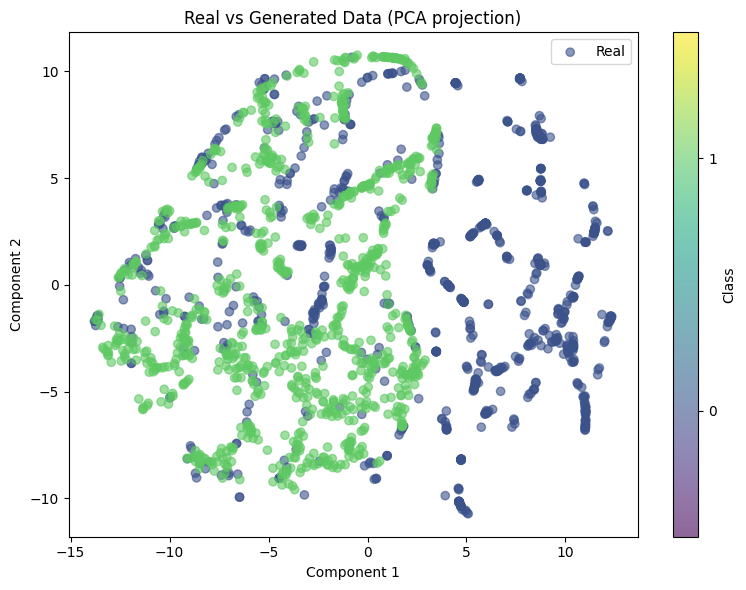

In [ ]:
# Number of samples to visualize
num_samples = 1000

# Generate fake data using the trained generator
noise = torch.randn(num_samples, latent_dim)
generated_data = generator(noise).detach().numpy()

# Take a subset of real data for comparison
real_data_subset = X_train[:num_samples]

# Combine real and generated data for dimensionality reduction
all_data = np.vstack([real_data_subset, generated_data])
labels = ['Real'] * num_samples + ['Generated'] * num_samples

# ---------------------
# Dimensionality Reduction
# ---------------------

# Option 1: Use PCA
reducer = PCA(n_components=2)
reduced_data = reducer.fit_transform(all_data)

# Option 2: Use t-SNE (uncomment to use)
reducer = TSNE(n_components=2, perplexity=30, n_iter=300)
reduced_data = reducer.fit_transform(all_data)

# ---------------------
# Plotting
# ---------------------
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=[0 if label == 'Real' else 1 for label in labels], cmap='viridis', alpha=0.6)
plt.title("Real vs Generated Data (PCA projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter, ticks=[0, 1], label='Class')
plt.clim(-0.5, 1.5)
plt.legend(['Real', 'Generated'], loc='upper right')
plt.tight_layout()
plt.show()

=== Statistical Evaluation ===
Average Mean Difference: 0.2293
Average Std Difference: 0.6923

=== Statistical Tests ===
Average KS Statistic: 0.7679
KS Test Interpretation: < 0.1 excellent, < 0.2 good, < 0.3 fair

=== Discriminative Score ===
Discriminative Score (Accuracy): 1.0000
Ideal Score: 0.5000 (perfectly indistinguishable)

=== Correlation Analysis ===
Correlation Matrix Difference (Frobenius norm): 32.8606

=== Coverage and Authenticity ===
Data Coverage: 0.9500
Data Authenticity: 0.9736

=== Generating Distribution Plots ===


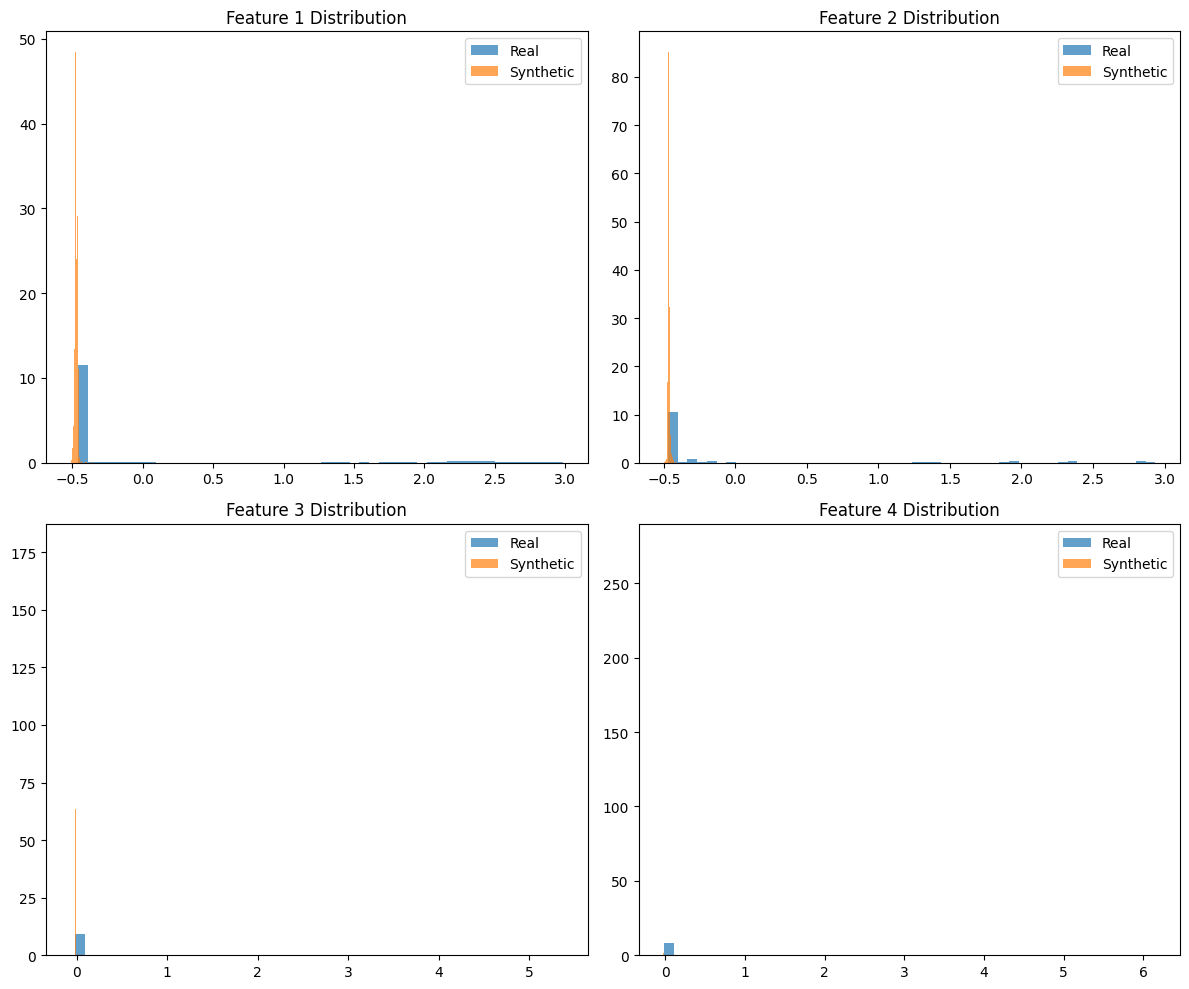


=== Summary Scores ===
Statistical Similarity Score: 0.2321
Quality Score (1 - |0.5 - disc_score|): 0.5000
Coverage Score: 0.9500
Authenticity Score: 0.9736

Overall Quality Score: 0.6044
Score Interpretation: > 0.8 excellent, > 0.6 good, > 0.4 fair, ≤ 0.4 poor

DETAILED EVALUATION RESULTS
mean_diff: 0.2293
std_diff: 0.6923
ks_statistic: 0.7679
discriminative_score: 1.0000
correlation_diff: 32.8606
coverage: 0.9500
authenticity: 0.9736
overall_score: 0.6044


In [ ]:
def evaluate_synthetic_data_quality(real_data, generated_data):
    """
    Comprehensive evaluation of synthetic data quality
    """

    # 1. Statistical Metrics
    print("=== Statistical Evaluation ===")

    # Basic statistics comparison
    real_mean = np.mean(real_data, axis=0)
    real_std = np.std(real_data, axis=0)
    synth_mean = np.mean(generated_data, axis=0)
    synth_std = np.std(generated_data, axis=0)

    # Mean and std difference
    mean_diff = np.mean(np.abs(real_mean - synth_mean))
    std_diff = np.mean(np.abs(real_std - synth_std))

    print(f"Average Mean Difference: {mean_diff:.4f}")
    print(f"Average Std Difference: {std_diff:.4f}")

    # 2. Statistical Tests
    print("\n=== Statistical Tests ===")

    # Kolmogorov-Smirnov test (on each feature)
    ks_stats = []
    for i in range(real_data.shape[1]):
        ks_stat, _ = stats.ks_2samp(real_data[:, i], generated_data[:, i])
        ks_stats.append(ks_stat)

    avg_ks_stat = np.mean(ks_stats)
    print(f"Average KS Statistic: {avg_ks_stat:.4f}")
    print(f"KS Test Interpretation: < 0.1 excellent, < 0.2 good, < 0.3 fair")

    # 3. Discriminative Score (Detectability Test)
    print("\n=== Discriminative Score ===")

    def discriminative_score(real_data, synth_data):
        # Combine real and synthetic data
        X = np.vstack([real_data, synth_data])
        y = np.hstack([np.zeros(len(real_data)), np.ones(len(synth_data))])

        # Shuffle data
        indices = np.random.permutation(len(X))
        X, y = X[indices], y[indices]

        # Use Random Forest classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

        # The closer to 0.5, the better (means hard to distinguish)
        return np.mean(scores)

    disc_score = discriminative_score(real_data, generated_data)
    print(f"Discriminative Score (Accuracy): {disc_score:.4f}")
    print(f"Ideal Score: 0.5000 (perfectly indistinguishable)")

    # 4. Correlation Structure Preservation (Fixed version)
    print("\n=== Correlation Analysis ===")

    def safe_corrcoef(data):
        """Compute correlation matrix with zero-std handling"""
        # Remove constant features (zero std)
        stds = np.std(data, axis=0)
        non_constant_features = stds > 1e-10

        if np.sum(non_constant_features) == 0:
            return np.eye(data.shape[1])  # Return identity matrix if all features are constant

        if np.sum(non_constant_features) == 1:
            corr_matrix = np.eye(data.shape[1])
            return corr_matrix

        # Compute correlation only for non-constant features
        filtered_data = data[:, non_constant_features]
        corr_filtered = np.corrcoef(filtered_data.T)

        # Reconstruct full correlation matrix
        corr_full = np.eye(data.shape[1])
        valid_indices = np.where(non_constant_features)[0]

        for i, idx1 in enumerate(valid_indices):
            for j, idx2 in enumerate(valid_indices):
                corr_full[idx1, idx2] = corr_filtered[i, j]

        return corr_full

    real_corr = safe_corrcoef(real_data)
    synth_corr = safe_corrcoef(generated_data)

    # Frobenius norm of correlation difference
    corr_diff = np.linalg.norm(real_corr - synth_corr, 'fro')
    print(f"Correlation Matrix Difference (Frobenius norm): {corr_diff:.4f}")

    # 5. Coverage and Authenticity Metrics (Fixed version)
    print("\n=== Coverage and Authenticity ===")

    def coverage_metric(real_data, synth_data, k=5):
        """Measure how much of real data space is covered by synthetic data"""
        from sklearn.neighbors import NearestNeighbors

        # Handle edge case of insufficient samples
        if len(synth_data) < k:
            k = max(1, len(synth_data))

        try:
            # Fit nearest neighbors on synthetic data
            nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(synth_data)

            # Find nearest synthetic neighbor for each real point
            distances, _ = nbrs.kneighbors(real_data)

            # Coverage: fraction of real points with close synthetic neighbors
            if len(distances) > 0:
                threshold = np.percentile(distances, 95) if len(distances) > 1 else np.max(distances)
                coverage = np.mean(distances.min(axis=1) <= threshold) if threshold > 0 else 1.0
            else:
                coverage = 0.0

        except Exception as e:
            print(f"Warning: Coverage calculation failed: {e}")
            coverage = 0.0

        return coverage

    def authenticity_metric(real_data, synth_data, k=5):
        """Measure how many synthetic points are close to real data"""
        from sklearn.neighbors import NearestNeighbors

        # Handle edge case of insufficient samples
        if len(real_data) < k:
            k = max(1, len(real_data))

        try:
            # Fit on real data
            nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(real_data)

            # Find nearest real neighbor for each synthetic point
            distances, _ = nbrs.kneighbors(synth_data)

            # Authenticity: fraction of synthetic points close to real data
            if len(distances) > 0:
                threshold = np.percentile(distances, 95) if len(distances) > 1 else np.max(distances)
                authenticity = np.mean(distances.min(axis=1) <= threshold) if threshold > 0 else 1.0
            else:
                authenticity = 0.0

        except Exception as e:
            print(f"Warning: Authenticity calculation failed: {e}")
            authenticity = 0.0

        return authenticity

    coverage = coverage_metric(real_data, generated_data)
    authenticity = authenticity_metric(real_data, generated_data)

    print(f"Data Coverage: {coverage:.4f}")
    print(f"Data Authenticity: {authenticity:.4f}")

    # 6. Visualization of Distributions
    print("\n=== Generating Distribution Plots ===")

    # Plot first few features for visual comparison
    n_features_to_plot = min(4, real_data.shape[1])
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    for i in range(n_features_to_plot):
        ax = axes[i] if n_features_to_plot > 1 else axes
        ax.hist(real_data[:, i], bins=50, alpha=0.7, label='Real', density=True)
        ax.hist(generated_data[:, i], bins=50, alpha=0.7, label='Synthetic', density=True)
        ax.set_title(f'Feature {i+1} Distribution')
        ax.legend()

    if n_features_to_plot > 0:
        plt.tight_layout()
        plt.show()

    # 7. Summary Scores
    print("\n=== Summary Scores ===")
    print(f"Statistical Similarity Score: {1 - avg_ks_stat:.4f}")
    print(f"Quality Score (1 - |0.5 - disc_score|): {1 - abs(0.5 - disc_score):.4f}")
    print(f"Coverage Score: {coverage:.4f}")
    print(f"Authenticity Score: {authenticity:.4f}")

    # Overall quality score (weighted average)
    overall_score = (0.3 * (1 - avg_ks_stat) +
                    0.3 * (1 - abs(0.5 - disc_score)) +
                    0.2 * coverage +
                    0.2 * authenticity)

    print(f"\nOverall Quality Score: {overall_score:.4f}")
    print("Score Interpretation: > 0.8 excellent, > 0.6 good, > 0.4 fair, ≤ 0.4 poor")

    return {
        'mean_diff': mean_diff,
        'std_diff': std_diff,
        'ks_statistic': avg_ks_stat,
        'discriminative_score': disc_score,
        'correlation_diff': corr_diff,
        'coverage': coverage,
        'authenticity': authenticity,
        'overall_score': overall_score
    }

# Generate synthetic data for evaluation
num_evaluation_samples = min(5000, len(X_train))
noise = torch.randn(num_evaluation_samples, latent_dim)
generated_data_eval = generator(noise).detach().numpy()
real_data_eval = X_train[:num_evaluation_samples]

# Run evaluation
evaluation_results = evaluate_synthetic_data_quality(real_data_eval, generated_data_eval)

# Print detailed results
print("\n" + "="*50)
print("DETAILED EVALUATION RESULTS")
print("="*50)
for key, value in evaluation_results.items():
    print(f"{key}: {value:.4f}")